# Minimum Energy Point of Quantum Harmonic Oscillators

## Frederico Wieser 18018699

In this notebook we will use numpy, scipy and matplotlib to explore quantum harmonic oscillators, their wavefunctions, corresponding energy, and gradients.

We will use atomic untis in this notebook, for effeciency in our calculations and clarity in the work.

Which correpsonds to $ \hbar = m_e = 1 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Section on 1D QHO

Our 1 dimensional wavefunction is

$$ \psi(x) = (2 \alpha / \pi)^{1/4} e^{-\alpha x^2} $$

which can be shown to have a corresponding energy of

$$ E_{GS} = \frac{\alpha}{2} + \frac{1}{8\alpha} $$

In [2]:
def bisection(fun,a,b,tol):
    """
    A root-finding algorithm for functions where you input
    values of upper and lower bound, which the root lies between.
    Returning the number of itterations to satisfy tolerance,
    and estimate for c, the root.
    
    Inputs:
    a = lower bound
    b = upper bound
    tol = tolerance of uncertainty in c
    fun = function you are finding root
    """
    
    tol_value = abs(a-b)
    
    i = 0 # Counter
    
    while tol_value > tol:
    
        # Calculate C
        c = (a + b)/2

        # Evaluate f(a) and f(b)
        f_a = fun(a)
        f_b = fun(b)
        f_c = fun(c)

        # Calculate signs 
        f_a_sign = np.sign(f_a)
        f_c_sign = np.sign(f_c)

        # If statement to replace a or b with c
        # depending on sign of f_c
        if f_a_sign == f_c_sign:
            a = c
        else:
            b = c
        
        i += 1
        tol_value = abs(a-b)
    
    return c, i

In [3]:
def QHO_E(alpha):
    """
    Energy function for 1-Dimensional Wave Equation.
    """
    
    a = alpha
    
    E_GS =  (a/2) + (1/(8*a))
    
    return E_GS

In [4]:
def QHO_grad(alpha):
    """
    Energy gradient function for 1-Dimensional Wave Equation, with
    respect to alpha.
    """
    
    a = alpha
    
    dE_GS_da = 0.5 - (1/(8*(a**2)))
    
    return dE_GS_da

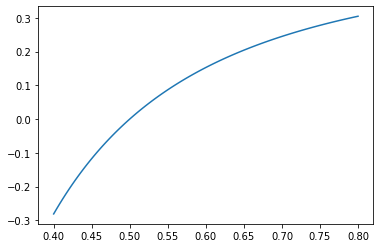

In [5]:
x = np.linspace(0.4,0.8,100)

plt.plot(x, QHO_grad(x))


In [6]:
# Define brackets and tolerance
a = 0.45
b = 0.55
tol = 0.1

# Output result
alpha, n = bisection(QHO_grad,a,b,tol)
print(alpha, n)

0.5 1


### Section on 2D QHO
Now we turn to the 2D QHO

In [7]:
def QHO_2D_E(x):
    """Docstring"""
    
    a = x[0]
    b = x[1]
    
    a2D, b2D = np.meshgrid(a, b)
    
    E_GS = (a2D/2) + (1/(8*a2D)) + (b2D/2) + (1/(8*b2D))
    
    return E_GS

In [8]:
def QHO_2D_grad(x):
    """Docstring"""

    a = x[0]
    b = x[1]
    
    dE_GS_da = 0.5 - (1/(8*(a**2)))
    
    dE_GS_db = 0.5 - (1/(8*(b**2)))
    
    return np.array([dE_GS_da ,dE_GS_db])

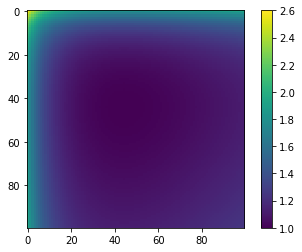

In [9]:
# You might want to plot the 2D function
alpha = np.linspace(0.1,1,100)
beta = np.linspace(0.1,1,100)

x = np.array([alpha, beta])

E = QHO_2D_E(x)

plt.imshow(E)
plt.colorbar()

In [11]:
from scipy import optimize
x0 = np.array([0.5,0.5])
opt_result = optimize.minimize(QHO_2D_E, x0, method='CG', jac=QHO_2D_grad) # Fill in appropriate functions for 1st and 4th arguments

print(opt_result)

     fun: array([[1.]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 1
     nit: 0
    njev: 1
  status: 0
 success: True
       x: array([0.5, 0.5])


In [ ]:
# Print resulting minimum, number of iterations using opt_result.x etc
# Confirm whether the optimisation was successful

### Conclusions
You might write something here about what you have learned (one or two lines only!)